In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora
from gensim import models

In [2]:
df = pd.read_csv("C:\\Users\\chris\\tripadvisor_hotel_reviews.csv", delimiter=";")
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
1978,wonderful excellent beautiful wow begin hotel ...,5
1979,"best location beach, husband traveled honolulu...",5
1980,awesome place stay outriiger beach great place...,5
1981,"great time, just returned trip stayed 7 nights...",4


In [3]:
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# remove negative stopwords
stop_words = set(stopwords.words('english'))
negative_stopwords = [word for word in stop_words if any(neg in word for neg in ["n't", 'not', 'no', 'nor', 'never'])]
stop_words = stop_words - set(negative_stopwords)

In [5]:
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    tokens = word_tokenize(text)
    cleaned_tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text

df['Cleaned_Review'] = df['Review'].apply(clean_text)
df[['Review', 'Cleaned_Review']].head()

,Review,Cleaned_Review
0,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,nice room not experience hotel monaco seattle ...
3,"unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...


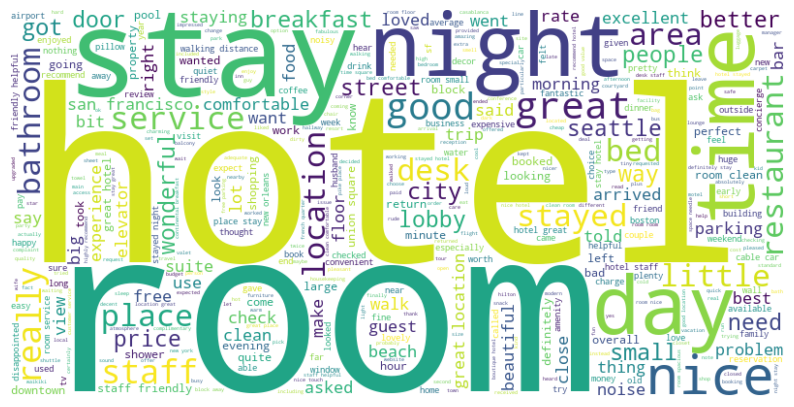

In [6]:
# create a wordcloud
wordcloud = WordCloud(width=800, height=400, max_words=1000, background_color='white').generate(' '.join(df['Cleaned_Review']))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
dictionary = corpora.Dictionary(df['Cleaned_Review'].apply(lambda x: x.split()))
corpus = [dictionary.doc2bow(text) for text in df['Cleaned_Review'].apply(lambda x: x.split())]

### BOW

In [8]:
bow_corpus = [dictionary.doc2bow(text) for text in df['Cleaned_Review'].apply(lambda x: x.split())]
print(bow_corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 5), (41, 2), (42, 1), (43, 2), (44, 1), (45, 1), (46, 3), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 3), (55, 1), (56, 1), (57, 1), (58, 2), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1)]


### TF-IDF

In [9]:
tfidf = models.TfidfModel(corpus)
tfidf_corpus = tfidf[corpus]

### LSA (Latent Semantic Analysis)

#### BOW

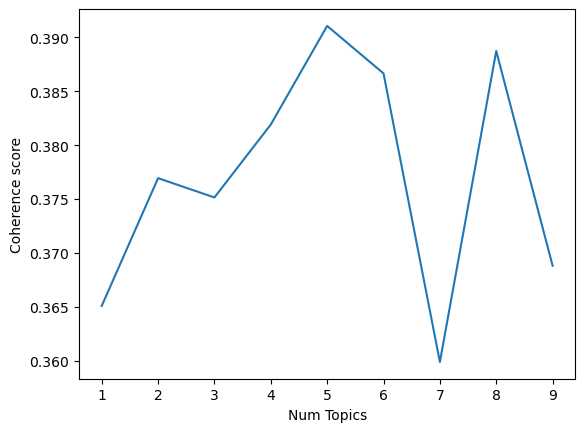

In [10]:
def calc_coherence(n_topics):
    lsi_model = models.LsiModel(bow_corpus, id2word=dictionary, num_topics=n_topics)
    coherencemodel = CoherenceModel(model=lsi_model, texts=df['Cleaned_Review'].apply(lambda x: x.split()), coherence='c_v')
    return coherencemodel.get_coherence()

coherence_values = [calc_coherence(i) for i in range(1, 10)]
plt.plot(range(1, 10), coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.show()

In [11]:
max(coherence_values), coherence_values.index(max(coherence_values))

(0.3910448673922223, 4)

In [12]:
# create the model
lsi_model = models.LsiModel(bow_corpus, id2word=dictionary, num_topics=2)

# get the topics
lsi_model.print_topics()

[(0,
  '-0.529*"hotel" + -0.517*"room" + -0.269*"not" + -0.159*"stay" + -0.158*"great" + -0.126*"staff" + -0.122*"night" + -0.106*"good" + -0.103*"location" + -0.101*"nice"'),
 (1,
  '0.669*"hotel" + -0.561*"room" + -0.292*"not" + 0.184*"great" + -0.090*"no" + 0.084*"location" + -0.071*"desk" + -0.068*"bed" + -0.058*"night" + 0.051*"restaurant"')]

#### TF-IDF

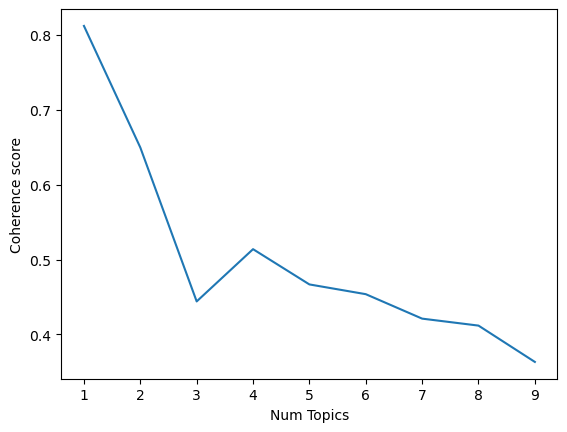

In [13]:
def calc_coherence(n_topics):
    lsi_model = models.LsiModel(tfidf_corpus, id2word=dictionary, num_topics=n_topics)
    coherencemodel = CoherenceModel(model=lsi_model, texts=df['Cleaned_Review'].apply(lambda x: x.split()), coherence='c_v')
    return coherencemodel.get_coherence()

coherence_values = [calc_coherence(i) for i in range(1, 10)]
plt.plot(range(1, 10), coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.show()

In [14]:
max(coherence_values), coherence_values.index(max(coherence_values))

(0.8120780397171588, 0)

In [15]:
# create the model
lsi_model = models.LsiModel(tfidf_corpus, id2word=dictionary, num_topics=4)

# get the topics
lsi_model.print_topics()

[(0,
  '-0.130*"great" + -0.121*"nice" + -0.116*"not" + -0.112*"good" + -0.108*"location" + -0.105*"place" + -0.101*"night" + -0.096*"clean" + -0.096*"stay" + -0.093*"parking"'),
 (1,
  '-0.276*"francisco" + -0.273*"san" + -0.193*"union" + -0.173*"cable" + -0.171*"square" + -0.159*"chancellor" + -0.154*"rex" + -0.129*"inn" + -0.121*"car" + -0.103*"value"'),
 (2,
  '-0.330*"casablanca" + 0.193*"parking" + -0.187*"york" + -0.186*"new" + -0.161*"wine" + 0.161*"seattle" + -0.150*"cheese" + 0.138*"pike" + 0.133*"market" + -0.128*"rick"'),
 (3,
  '0.229*"francisco" + 0.227*"san" + -0.179*"market" + -0.177*"pike" + 0.177*"chancellor" + -0.171*"quarter" + -0.170*"orleans" + -0.162*"seattle" + -0.158*"french" + -0.146*"new"')]

### LDA

#### BOW

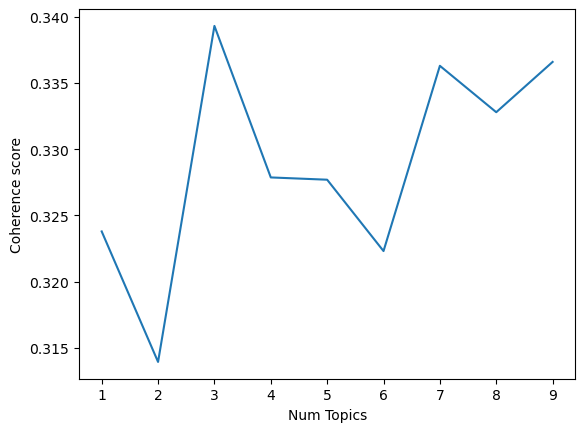

In [16]:
def calc_coherence(n_topics):
    lda_model = models.LdaModel(bow_corpus, id2word=dictionary, num_topics=n_topics)
    coherencemodel = CoherenceModel(model=lda_model, texts=df['Cleaned_Review'].apply(lambda x: x.split()), coherence='c_v')
    return coherencemodel.get_coherence()

coherence_values = [calc_coherence(i) for i in range(1, 10)]
plt.plot(range(1, 10), coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.show()

In [17]:
max(coherence_values), coherence_values.index(max(coherence_values))

(0.3393199687305326, 2)

In [18]:
# create the model
lda_model = models.LdaModel(bow_corpus, id2word=dictionary, num_topics=5)

# get the topics
lda_model.print_topics()

[(0,
  '0.036*"room" + 0.028*"hotel" + 0.013*"not" + 0.012*"great" + 0.010*"stay" + 0.009*"location" + 0.008*"night" + 0.008*"staff" + 0.006*"service" + 0.006*"place"'),
 (1,
  '0.028*"hotel" + 0.027*"room" + 0.018*"not" + 0.011*"stay" + 0.009*"staff" + 0.007*"great" + 0.006*"night" + 0.006*"time" + 0.006*"day" + 0.005*"clean"'),
 (2,
  '0.035*"hotel" + 0.024*"room" + 0.012*"not" + 0.011*"great" + 0.011*"location" + 0.010*"good" + 0.009*"stay" + 0.008*"staff" + 0.008*"clean" + 0.007*"nice"'),
 (3,
  '0.027*"room" + 0.023*"not" + 0.021*"hotel" + 0.010*"stay" + 0.010*"night" + 0.008*"no" + 0.007*"stayed" + 0.006*"bed" + 0.006*"great" + 0.006*"time"'),
 (4,
  '0.034*"hotel" + 0.027*"room" + 0.017*"great" + 0.012*"stay" + 0.012*"staff" + 0.010*"nice" + 0.009*"location" + 0.008*"not" + 0.007*"good" + 0.007*"stayed"')]

#### TF-IDF

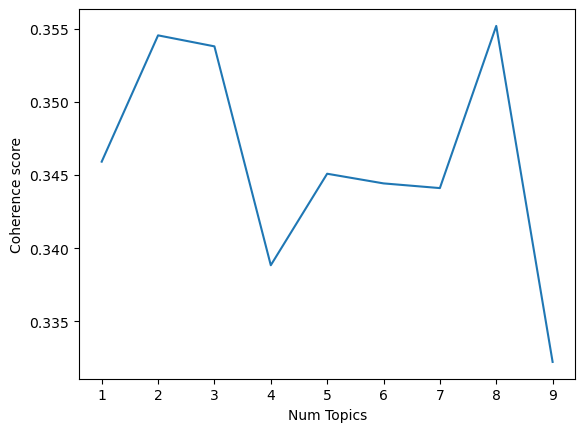

In [19]:
def calc_coherence(n_topics):
    lda_model = models.LdaModel(tfidf_corpus, id2word=dictionary, num_topics=n_topics)
    coherencemodel = CoherenceModel(model=lda_model, texts=df['Cleaned_Review'].apply(lambda x: x.split()), coherence='c_v')
    return coherencemodel.get_coherence()

coherence_values = [calc_coherence(i) for i in range(1, 10)]
plt.plot(range(1, 10), coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.show()

In [20]:
max(coherence_values), coherence_values.index(max(coherence_values))

(0.3551954633467742, 7)

In [21]:
# create the model
lda_model = models.LdaModel(tfidf_corpus, id2word=dictionary, num_topics=3)

# get the topics
lda_model.print_topics()

[(0,
  '0.002*"great" + 0.002*"not" + 0.002*"place" + 0.002*"good" + 0.002*"location" + 0.002*"street" + 0.002*"night" + 0.002*"nice" + 0.002*"stay" + 0.001*"block"'),
 (1,
  '0.002*"great" + 0.002*"nice" + 0.002*"not" + 0.002*"location" + 0.001*"day" + 0.001*"good" + 0.001*"clean" + 0.001*"beach" + 0.001*"bed" + 0.001*"service"'),
 (2,
  '0.002*"nice" + 0.002*"not" + 0.002*"good" + 0.001*"great" + 0.001*"night" + 0.001*"service" + 0.001*"small" + 0.001*"stay" + 0.001*"location" + 0.001*"time"')]